# load dataset and screen obvious outliers

In [1]:
%pylab inline
%matplotlib inline
import pandas as pd

store = pd.HDFStore('store.h5')
feats = store['feats']
labs = store['labs']

# sel=(labs.F!=0)
# labF = labs[sel].F
# featsF = feats[sel]

sel2=(labs['T']!=0)
labT = labs[sel2]['T']
featsT = feats[sel2]

# labV = labs.V
# featsV = feats

Populating the interactive namespace from numpy and matplotlib


# preprocessing the data

In [2]:
from sklearn import preprocessing
import numpy as np

#sfeatsF = pd.DataFrame(preprocessing.scale(featsF))
sfeatsT = pd.DataFrame(preprocessing.scale(featsT))
#sfeatsV = pd.DataFrame(preprocessing.scale(featsV))

X=sfeatsT
Y=labT
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(sfeatsT, labT, test_size=0.33, random_state=42)
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(44132, 81) (21738, 81) (44132,) (21738,)


$score = 1−\sum(y_{pred}−y_{true})^2/ \sum(y_{true}−y_{mean})^2$


In [3]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train,Y_train)

lowly_correlated= (lasso.coef_==0)
print 'deleted variables:',sum(lowly_correlated)
print 'score:',lasso.score(X_test,Y_test)

deleted variables: 9
score: 0.801639743414


/Users/crackhopper/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


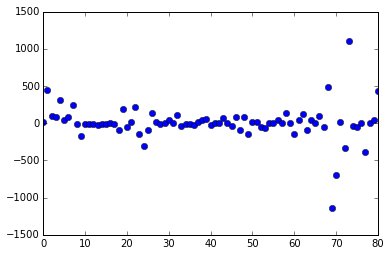

In [4]:
plot(lasso.coef_,'o')

In [12]:
s_idx=argsort(abs(lasso.coef_))[::-1]
importance = featsT.columns[s_idx]
for name,imp in zip(importance,lasso.coef_[s_idx]):
    print name,':',imp

EM3 : -1139.42748616
FRB3 : 1101.26092958
P3 : -690.415473378
FI3 : 482.123438379
TEG : 447.299737745
K4 : 432.341957911
EM4 : -383.285140951
K3 : -328.310316548
FPA : 307.188883762
PTDL : -302.925598065
FPD : 249.212335938
PTUL : 212.148204401
PL : 194.330165307
PJ : -167.130076136
SITA : -150.417775763
FI2 : -149.379770112
PTU : -138.693047521
PTUR : 136.827720269
H2 : 135.699816767
P2 : 118.820193289
PZDL : 107.606655637
W : 97.3045088838
SDL : -96.425890293
SITA2 : -96.3940397781
PTDR : -94.984147486
WL : -94.3104913227
H3 : 92.2736640482
FP : 89.8591230997
FPC : 85.2026032439
SDR : 82.428370452
SUL : 79.0663261726
SC : 68.6725627661
EM1 : -67.4025942374
TL : 61.4306747226
Y3 : -56.8719869632
FI1 : -53.2764473612
Y4 : -51.9366968829
SIGMA : -51.5373847866
FPB : 48.4765928845
SITA4 : 48.2284666503
PZUR : 45.3449977234
K1 : 40.7160654799
PDWLL : -38.1332297793
PFL : 37.1823110145
EM2 : 37.1280189508
K2 : 36.8681111583
SUR : -36.1230176046
H4 : -31.2274187017
TEZ : 22.014461941
PBL : 

# use full data

In [13]:
lasso.fit(X,Y)
print 'score:',lasso.score(X,Y)

score: 0.802809115835


# use RF to try

In [16]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(n_estimators=10, criterion='mse', 
          max_depth=None, min_samples_split=2, 
          min_samples_leaf=1, min_weight_fraction_leaf=0.0,
          max_features='auto', max_leaf_nodes=None, bootstrap=True,
          oob_score=False, n_jobs=1, random_state=None, verbose=0, 
          warm_start=False)
rfr.fit(X_train,Y_train)
print rfr.score(X_test,Y_test)

0.990948817254


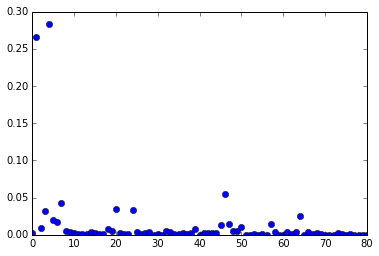

In [17]:
plot(rfr.feature_importances_,'o')

In [19]:
s_idx=argsort(rfr.feature_importances_)[::-1]
importance = featsT.columns[s_idx]
for name,imp in zip(importance,rfr.feature_importances_[s_idx]):
    print name,':',imp

FPA : 0.283152497043
TEG : 0.26642052614
SDR : 0.0552176695169
FPD : 0.0425087393428
SIGMA : 0.0350866109715
PTDL : 0.0336917868346
FP : 0.0314973073525
K2 : 0.0259208188938
FPB : 0.0199393956155
FPC : 0.0177368784531
FRB1 : 0.0145451364767
SDL : 0.0140409902767
SUR : 0.0134976100181
H1 : 0.0108252130397
W : 0.00977613303363
TL : 0.00820515141157
WL : 0.00754171427527
SITA : 0.00558609269243
PZDL : 0.00555397922704
PSB : 0.00532171939341
SUL : 0.00522215196759
PL : 0.00484690006795
PJ : 0.00434611666887
EM2 : 0.00430723377379
PDWHUR : 0.00372396540699
H2 : 0.00369120694744
H3 : 0.00366342834619
PDWLL : 0.00348352579966
SITA2 : 0.00344669777231
PTDR : 0.00337154597257
TEL : 0.00327092973308
PBL : 0.00274317228101
TEZ : 0.00271702593768
SB : 0.00251835656343
FRB3 : 0.00249932664579
PFL : 0.00239073809822
SD : 0.00227155741813
SC : 0.00216450112423
PDWUR : 0.00207193192031
PDWHRR : 0.00198403258424
PDWHUL : 0.00192974425717
SA : 0.0018848584519
FI3 : 0.0018337490068
PPLT : 0.0018080923333